## **CNN with MNIST Data**

In [16]:
import pandas as pd
import seaborn as sns
import tensorflow as tf                       
import numpy as np                           
import matplotlib.pyplot as plt               
%matplotlib inline

In [17]:
print(tf.__version__)

2.8.0


In [18]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('CPU')))

Num GPUs Available:  1


In [19]:
tf.config.list_physical_devices('GPU')

[]

In [20]:
# Release GPU memory to prevent memory-leaks.

from numba import cuda
device = cuda.get_current_device()
device.reset()

In [21]:
!nvidia-smi

Thu Mar 10 22:21:40 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 511.79       Driver Version: 511.79       CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A    0C    P0    N/A /  N/A |      0MiB /  2048MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [22]:
from tensorflow.keras.datasets.mnist import load_data    # To load the MNIST digit dataset

(X_train, y_train) , (X_test, y_test) = load_data()      # Loading data

In [23]:
print("There are ", len(X_train), "images in the training dataset")     
print("There are ", len(X_test), "images in the test dataset")   

There are  60000 images in the training dataset
There are  10000 images in the test dataset


In [24]:
# Checking the shape of one image
X_train[8].shape

(28, 28)

In [25]:
X_train[8]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   5,
         63, 197,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [26]:
X_train[8].shape

(28, 28)

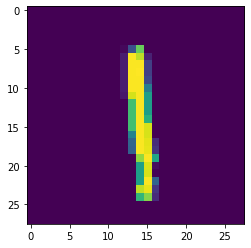

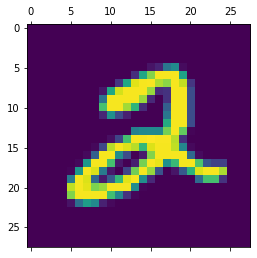

In [27]:
plt.imshow(X_train[8])
plt.matshow(X_train[5])

In [28]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

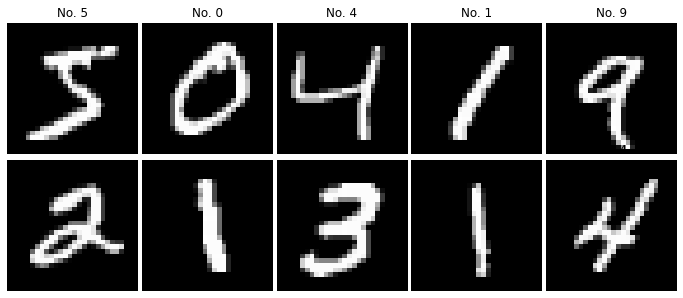

In [29]:
num_rows, num_cols = 2, 5
f, ax = plt.subplots(2, 5, figsize=(12,5),
                     gridspec_kw={'wspace':0.03, 'hspace':0.02}, 
                     squeeze=True)

for r in range(num_rows):
    for c in range(num_cols):
      
        image_index = r * 5 + c
        ax[r,c].axis("off")
        ax[r,c].imshow( X_train[image_index], cmap='gray')
        ax[r,c].set_title('No. %d' % y_train[image_index])
plt.show()
plt.close()

## Data Preprocessing

In [30]:
X_train[9].min()

0

In [31]:
X_train[9].max()

255

In [32]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [33]:
X_train[9].min()

0.0

In [34]:
X_train[9].max()

1.0

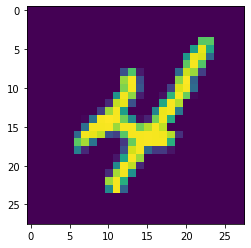

In [35]:
plt.imshow(X_train[9])

In [36]:
X_train = X_train.reshape(X_train.shape[0],28, 28, 1) 
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [37]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [38]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [39]:
from tensorflow.keras.utils import to_categorical

In [40]:
Y_train = to_categorical(y_train, 10) 
Y_test = to_categorical(y_test, 10)
Y_test.shape

(10000, 10)

In [42]:
Y_train[0].reshape(-1,1)

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.]], dtype=float32)

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [43]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(28, 28, 1), activation='relu'))

model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

**A sample example showing the conversion of 3D data to 2D**
![3Dto2D](https://dphi-courses.s3.ap-south-1.amazonaws.com/Deep+Learning+Bootcamp/3D+to++2D.png)

In [44]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
__________________________________________________

In [45]:
from tensorflow.keras.callbacks import EarlyStopping

In [46]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [47]:
model.fit(X_train, Y_train, batch_size=32, epochs=10, validation_data=(X_test,Y_test),callbacks=[early_stop])


Epoch 1/10
1874/1875 [============================>.] - ETA: 0s - loss: 0.1574 - accuracy: 0.9538

In [ ]:
model.metrics_names

['loss', 'accuracy']

In [ ]:
model.history.history

{'loss': [0.15704083442687988,
  0.05101916566491127,
  0.03318318724632263,
  0.022413989529013634,
  0.014858492650091648,
  0.009890713728964329],
 'accuracy': [0.9533500075340271,
  0.984416663646698,
  0.9894833564758301,
  0.9929333329200745,
  0.9950666427612305,
  0.9967666864395142],
 'val_loss': [0.07450182735919952,
  0.051314085721969604,
  0.047280680388212204,
  0.04590054601430893,
  0.047487203031778336,
  0.04590177908539772],
 'val_accuracy': [0.9761000275611877,
  0.984000027179718,
  0.9836999773979187,
  0.9857000112533569,
  0.9843000173568726,
  0.9865000247955322]}

In [ ]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.157041,0.953350,0.074502,0.9761
1,0.051019,0.984417,0.051314,0.9840
2,0.033183,0.989483,0.047281,0.9837
3,0.022414,0.992933,0.045901,0.9857
4,0.014858,0.995067,0.047487,0.9843


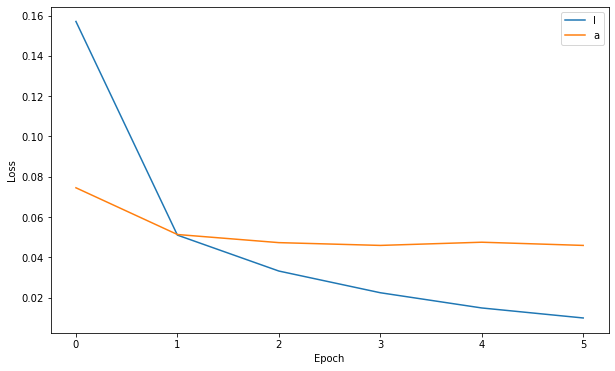

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(summary.loss)
plt.plot(summary.val_loss)
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend('labels')

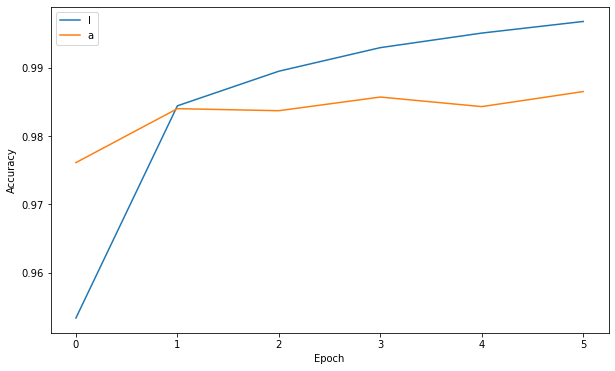

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(summary.accuracy)
plt.plot(summary.val_accuracy)
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend('labels');

In [ ]:
print(model.evaluate(X_test,Y_test,verbose=1))

313/313 [==============================] - 1s 5ms/step - loss: 0.0459 - accuracy: 0.9865
[0.04590177908539772, 0.9865000247955322]


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
preds = model.predict(X_test)
preds

array([[2.2640905e-11, 5.7559426e-11, 2.8443202e-08, ..., 1.0000000e+00,
        5.1851705e-09, 1.6249132e-08],
       [4.1235687e-08, 9.7200648e-08, 9.9999976e-01, ..., 1.3998480e-13,
        1.4916328e-08, 2.1216791e-09],
       [2.7973197e-08, 9.9999833e-01, 1.6493285e-08, ..., 8.7263817e-07,
        5.2122175e-07, 2.6775734e-08],
       ...,
       [1.3322630e-18, 5.5757439e-15, 7.0235697e-16, ..., 7.7068218e-09,
        4.9686526e-09, 4.0459169e-09],
       [6.1629667e-13, 5.2129398e-18, 2.9092625e-18, ..., 1.3597165e-13,
        4.9119490e-07, 5.7641595e-14],
       [1.7886299e-10, 1.9544814e-13, 1.7428378e-12, ..., 5.9252381e-14,
        2.7562105e-11, 2.3692129e-12]], dtype=float32)

In [ ]:
preds[0]

array([2.2640905e-11, 5.7559426e-11, 2.8443202e-08, 6.7957093e-09,
       7.0849520e-12, 7.2534752e-13, 1.8620123e-16, 1.0000000e+00,
       5.1851705e-09, 1.6249132e-08], dtype=float32)

In [ ]:
predictions= np.argmax(preds, axis=1)

In [ ]:
len(predictions)

10000

In [ ]:
predictions

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.98      0.99      0.98      1032
           3       0.99      0.98      0.99      1010
           4       0.99      0.98      0.99       982
           5       0.98      0.99      0.99       892
           6       0.99      0.98      0.98       958
           7       0.99      0.98      0.98      1028
           8       0.99      0.99      0.99       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [ ]:
print(confusion_matrix(y_test, predictions))

[[ 974    1    1    1    0    1    2    0    0    0]
 [   0 1131    1    1    0    0    2    0    0    0]
 [   2    1 1017    0    1    0    3    3    3    2]
 [   0    0    2  994    0    8    0    1    4    1]
 [   0    0    2    0  964    0    4    0    1   11]
 [   1    0    0    4    0  886    1    0    0    0]
 [   7    2    0    0    1    6  940    0    2    0]
 [   1    3    9    0    0    0    0 1010    1    4]
 [   1    0    2    1    0    1    1    3  960    5]
 [   0    3    0    0    4    3    0    7    3  989]]


In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.04590177908539772
Test accuracy: 0.9865000247955322


In [ ]:
my_number = X_test[5]

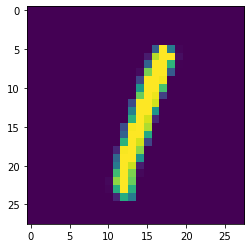

In [ ]:
plt.imshow(my_number.reshape(28,28));

In [ ]:
model.predict(my_number.reshape(1,28,28,1))

array([[1.3061336e-08, 9.9999511e-01, 8.6170928e-09, 5.6465848e-12,
        7.0288451e-08, 3.5584016e-10, 3.1140465e-10, 4.5637876e-06,
        2.0866831e-07, 6.7501911e-09]], dtype=float32)

In [ ]:
# SHAPE --> (num_images,width,height,color_channels)
np.argmax(model.predict(my_number.reshape(1,28,28,1)), axis=1)

array([1], dtype=int64)

In [ ]:
model.save("cnn-1.h5")